# Lifestyle Habits and Heart Attack Risk Analysis

In this data analysis project, we delve into the exploration of habits that potentially elevate the risk of experiencing a heart attack. Our objective revolves around deciphering the distinctive characteristics of patient behavior and uncovering their correlations with the likelihood of heart attacks. Furthermore, we extend our investigation to examine the interconnections among various variables within the dataset, particularly in patients exhibiting a higher susceptibility to heart attacks. Through this endeavor, our primary aim is to elucidate the information embedded in the dataset and construct a comprehensive overview of a prevalent medical condition: heart disease.

---

In [277]:
#Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats


In [278]:
####Haillet's Code

#Reading main csvfile for heart_attack_prediction_dataset

with open('./heart_attack_prediction_dataset.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    headers=next(csvreader)
    data_rows = [row for row in csvreader if row]

    complete_dataset = pd.DataFrame(data_rows,columns=headers)
    
complete_dataset.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.6150014529140595,261404,31.251232725295402,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963458839757678,285768,27.1949733519874,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463425838029828,235282,28.176570683909873,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648980824461007,125640,36.464704293082846,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.5148209264291386,160555,21.809144180619754,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [279]:
#Counting Demographic values
patient_id_count = complete_dataset['Patient ID'].count()
country_count = complete_dataset['Country'].nunique()
age_count = complete_dataset['Age'].count()

data = {
    'Column Name': ['Patient ID', 'Countries', 'Age Count'],
    'Number of Values': [patient_id_count, country_count, age_count]
}

description_dataframe = pd.DataFrame(data)

description_dataframe

,Column Name,Number of Values
0,Patient ID,8763
1,Countries,20
2,Age Count,8763


In [280]:
#Patients by Country Distribution
country_counts = complete_dataset['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

country_counts

,Country,Count
0,Germany,477
1,Argentina,471
2,Brazil,462
3,United Kingdom,457
4,Australia,449
5,Nigeria,448
6,France,446
7,Canada,440
8,China,436
9,New Zealand,435


In [281]:
#Age Stats

#Covert Age into a numeric value
complete_dataset['Age'] = pd.to_numeric(complete_dataset['Age'], errors='coerce')

#Calculate Stats
age_mean=complete_dataset ['Age'].mean()
age_median=complete_dataset ['Age'].median()
age_mode=complete_dataset ['Age'].mode()[0]
max_age = complete_dataset['Age'].max()
min_age = complete_dataset['Age'].min()
std_dev_age = complete_dataset['Age'].std()


Age_stats={ 'Age':['Mean', 'Median', 'Mode', 'Max Value', 'Min Value', 'Std Dev'],
           'Results':[age_mean,age_median,age_mode, max_age,min_age, std_dev_age]}

Age_stats_df=pd.DataFrame(Age_stats)

Age_stats_df

,Age,Results
0,Mean,53.707977
1,Median,54.000000
2,Mode,90.000000
3,Max Value,90.000000
4,Min Value,18.000000
5,Std Dev,21.249509


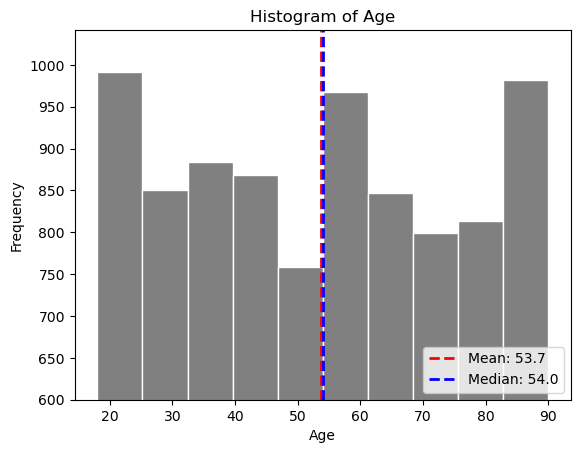

In [282]:
# Age Distribution
age_data = complete_dataset['Age']

plt.hist(age_data, bins=10, color='gray',edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.ylim(600)

plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {age_mean:.1f}')
plt.axvline(age_median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {age_median:.1f}')
plt.legend(loc='lower right')

# Save the figure
plt.savefig("output_data/Histogram of Age.png")

plt.show()

**OUTCOME**:

Findings: Our dataset comprises information on 8,763 observed patients from 20 different countries. Among these patients, 30.3% are females, while 69.7% are males. The age range of the patients varies from 18 to 90 years old, with a mean age of 53.70 years, a median age of 54 years, and a stadard deviation of 21.

---

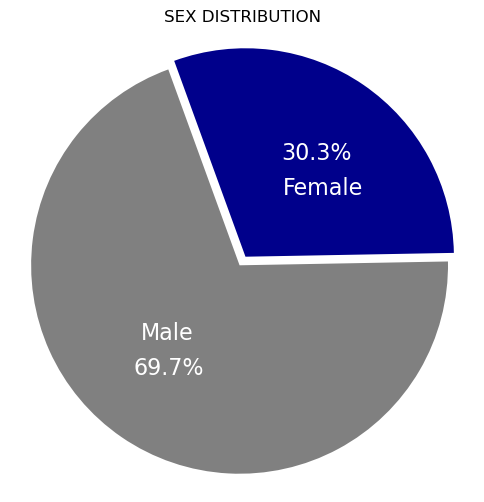

In [283]:
#Sex Breakdown

sex_counts = complete_dataset['Sex'].value_counts()
labels = ['Female', 'Male']
sizes = sex_counts.values
colors = ['gray', 'darkblue']


# Create a pie chart with labels inside the pie
plt.figure(figsize=(6, 6))
explode = (0.05, 0)  
plt.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=110, explode=explode, textprops={'fontsize': 16, 'color':'white'})
plt.title('SEX DISTRIBUTION')
# Add custom labels with specified colors
plt.text(0.18, 0.3, 'Female', fontsize=16, color='w')
plt.text(-0.5, -0.4, 'Male', fontsize=16, color='w')

# Save the figure
plt.savefig("output_data/Sex Distribution.png")

# Display the chart
plt.axis('equal')
plt.show()

**OUTCOME**:

The study predominantly included male participants, with 6,107 out of the total sample of 8,763 patients. In contrast, females comprise a minority, accounting for only 2,655 (30.3%) of the patients who participated in the research.


---

## Sequential Analysis of Multifactorial Variables on Patients with Risk of Heart Attack

---

### Influence of Diet on Heart Attacks


In [284]:
#Reading csv file for Risk of Heart Attack results

with open('./heart_attack_df.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    headers_heart=next(csvreader)
    data_rows = [row for row in csvreader if row]

    heart_attack_df = pd.DataFrame(data_rows,columns=headers_heart)
        
# heart_attack_df.head()
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Patient ID                       3139 non-null   object
 1   Age                              3139 non-null   object
 2   Sex                              3139 non-null   object
 3   Cholesterol                      3139 non-null   object
 4   Blood Pressure                   3139 non-null   object
 5   Heart Rate                       3139 non-null   object
 6   Diabetes                         3139 non-null   object
 7   Family History                   3139 non-null   object
 8   Smoking                          3139 non-null   object
 9   Obesity                          3139 non-null   object
 10  Alcohol Consumption              3139 non-null   object
 11  Exercise Hours Per Week          3139 non-null   object
 12  Diet                             3

In [285]:
#Reading csv file for Risk of NO Heart Attack results

with open('./non_heart_attack_df.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    headers_non_heart=next(csvreader)
    data_rows = [row for row in csvreader if row]

    non_heart_attack_df = pd.DataFrame(data_rows,columns=headers_non_heart)
        
non_heart_attack_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.61500145291406,261404,31.2512327252954,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963458839757678,285768,27.1949733519874,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463425838029828,235282,28.176570683909876,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648980824461007,125640,36.464704293082846,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.5148209264291386,160555,21.809144180619757,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [286]:
#Diet Results for Patients that had a heart attack

diet_heart = heart_attack_df['Diet'].value_counts()
diet_heart

Healthy      1079
Unhealthy    1034
Average      1026
Name: Diet, dtype: int64

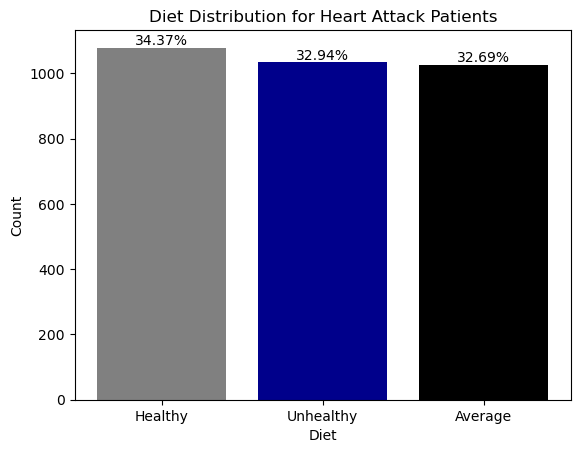

In [287]:
diet_heart = heart_attack_df['Diet'].value_counts()
category_order = ['Healthy', 'Unhealthy', 'Average']

# Create a bar chart using the values from diet_non_heart
plt.bar(category_order, diet_heart.values, color=['gray', 'darkblue', 'black'])

# Adding labels and title
plt.xlabel('Diet')
plt.ylabel('Count')
plt.title('Diet Distribution for Heart Attack Patients')

# Annotate bars with percentages
total_count = diet_heart.sum()
for i in range(len(diet_heart)):
    percentage = (diet_heart.values[i] / total_count) * 100
    plt.annotate(f'{percentage:.2f}%', (diet_heart.index[i], diet_heart.values[i]), ha='center', va='bottom')

# Save the figure
plt.savefig("output_data/bar diet with heart attack.png")

# Show the bar chart
plt.show()

**OUTCOME**:

The majority of patients who had a heart attack followed a “Healthy" diet, with 1,079 individuals (34.37% of the total)

---

In [288]:
#Diet Results for Patients that had a heart attack

diet_non_heart = non_heart_attack_df['Diet'].value_counts()
diet_non_heart

Average      1886
Healthy      1881
Unhealthy    1857
Name: Diet, dtype: int64

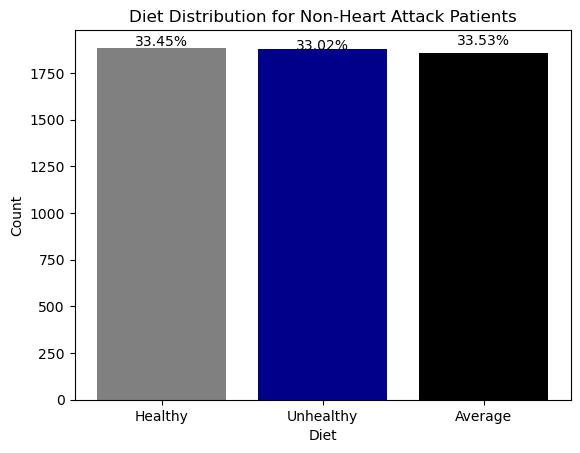

In [289]:
diet_non_heart = non_heart_attack_df['Diet'].value_counts()
category_order_n = ['Healthy', 'Unhealthy', 'Average']

# Create a bar chart using the values from diet_non_heart
plt.bar(category_order_n, diet_non_heart.values, color=['gray', 'darkblue', 'black'])

# Adding labels and title
plt.xlabel('Diet')
plt.ylabel('Count')
plt.title('Diet Distribution for Non-Heart Attack Patients')

# Annotate bars with percentages
total_count = diet_non_heart.sum()
for i in range(len(diet_non_heart)):
    percentage = (diet_non_heart.values[i] / total_count) * 100
    plt.annotate(f'{percentage:.2f}%', (diet_non_heart.index[i], diet_non_heart.values[i]), ha='center', va='bottom')


# Save the figure
plt.savefig("output_data/bar diet non heart attack.png")

# Show the bar chart
plt.show()

**OUTCOME**:

The "Average" diet was the most common among those that didn’t have heart attacks, with 1,886 individuals (33.80% of the total).
"Healthy" and "Unhealthy" diets were nearly equally distributed, with 1,881 (33.72%) and 1,857 (33.48%) individuals, respectively.


---

### Influence of Alcohol Consumption on Heart Attacks

In [290]:
####Rodrigo's code

#Reading csvfile for Heart Attack Risk dataset
csv_path = os.path.join('heart_attack_df.csv')
heart_attack_df = pd.read_csv(csv_path, encoding='utf-8')

In [291]:
#Defining columns of the main dataset
complete_dataset.columns
columns = complete_dataset.columns

In [292]:
# filter data for Alcohol consumtion for Heart Attack Risk
alcohol_count = heart_attack_df['Alcohol Consumption'].value_counts()
alcohol_count

1    1849
0    1290
Name: Alcohol Consumption, dtype: int64

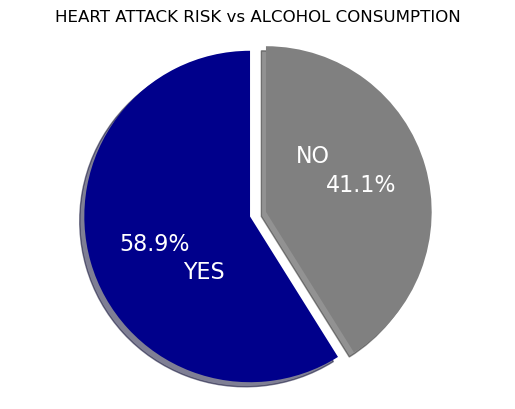

In [293]:
# Generate a pie plot showing the distribution of 
alcohol = ['Yes', 'No']
count= [1849, 1290]
plt.pie(count, labels=alcohol, autopct="%1.1f%%", shadow=True, startangle=90, colors=['darkblue','gray'], explode = (0.1, 0), textprops={'fontsize': 16, 'color':'white'})
# Add custom labels with specified colors
plt.text(0.18, 0.3, 'NO', fontsize=16, color='w')
plt.text(-0.5, -0.4, 'YES', fontsize=16, color='w')
plt.axis("equal")
plt.title('HEART ATTACK RISK vs ALCOHOL CONSUMPTION')

# Save the figure
plt.savefig("output_data/Heart Attack vs. Alcohol.png")

# Show the pie chart
plt.show()

In [294]:
# filter data for Alcohol consumtion for Non_Heart Attack Risk
alcohol_count = non_heart_attack_df['Alcohol Consumption'].value_counts()
alcohol_count

1    3392
0    2232
Name: Alcohol Consumption, dtype: int64

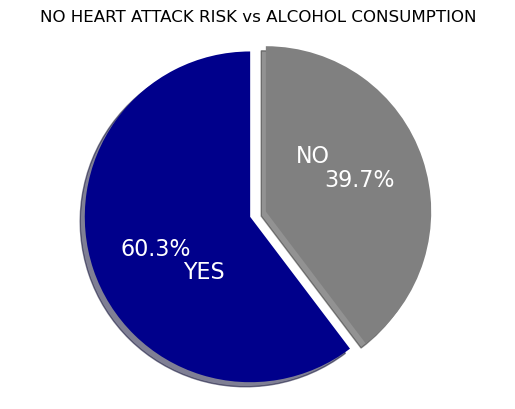

In [295]:
# Generate a pie plot showing the distribution of 
alcohol = ['Yes', 'No']
count= [3392, 2232]
plt.pie(count, labels=None, autopct="%1.1f%%", shadow=True, startangle=90, colors=['darkblue','grey'], explode = (0.1, 0), textprops={'fontsize': 16, 'color':'white'})
# Add custom labels with specified colors
plt.text(0.18, 0.3, 'NO', fontsize=16, color='w')
plt.text(-0.5, -0.4, 'YES', fontsize=16, color='w')
plt.axis("equal")
plt.title('NO HEART ATTACK RISK vs ALCOHOL CONSUMPTION')

# Save the figure
plt.savefig("output_data/Non Heart Attack Vs. Alcohol.png")

# Show the pie chart
plt.show()

**OUTCOME**: 

Among individuals who experienced heart attacks, a significant 58.9% were found to be regular consumers of alcohol. Interestingly, when comparing this to the population without heart attacks, the distribution is quite similar, with observations indicating that 60.3% of those who did not have heart attacks also engage in regular alcohol consumption. 

This similarity in alcohol consumption patterns between the two groups highlights the need for a more comprehensive examination of other risk factors contributing to heart attacks and underscores the complex nature of heart health.


---

### Influence of Exercise on Heart Attacks


In [296]:
# filter data for Exercise in Heart Attack Risk
har_exercise_cero = heart_attack_df.loc[heart_attack_df['Physical Activity Days Per Week'] == 0]
har_exercise_low = heart_attack_df.loc[(heart_attack_df['Physical Activity Days Per Week'] > 0) & (heart_attack_df['Physical Activity Days Per Week'] < 4)]
har_exercise_high = heart_attack_df.loc[heart_attack_df['Physical Activity Days Per Week'] > 4]

In [297]:
# counting the volume of people who exercise in each category
har_exercise_cero_count = har_exercise_cero['Physical Activity Days Per Week'].count()
har_exercise_low_count = har_exercise_low['Physical Activity Days Per Week'].count()
har_exercise_high_count = har_exercise_high['Physical Activity Days Per Week'].count()

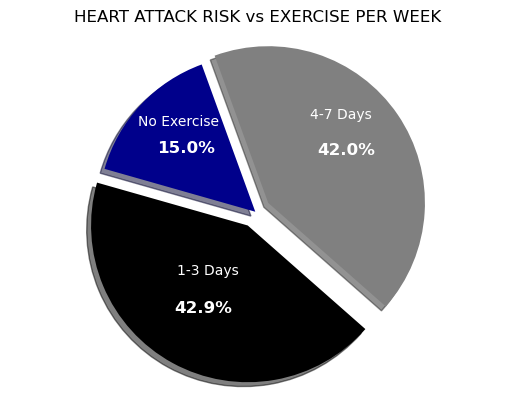

In [298]:
# Generate a pie plot showing the distribution of 
days = ['No Exercise', '1-3 Days', '4-7 Days']
count= [har_exercise_cero_count, har_exercise_low_count, har_exercise_high_count]
plt.pie(count, labels=days, autopct="%1.1f%%", shadow=True, startangle=110, colors=['darkblue','black','grey'], explode = (0, 0.1, 0.1), textprops={'fontsize': 12, 'color':'white', 'fontweight':'bold'})
plt.text(-0.75, 0.55, 'No Exercise', fontsize=10, color='w')
plt.text(-0.5, -0.4, '1-3 Days', fontsize=10, color='w')
plt.text(0.35, 0.6, '4-7 Days', fontsize=10, color='w')
plt.axis("equal")
plt.title('HEART ATTACK RISK vs EXERCISE PER WEEK')

# Save the figure
plt.savefig("output_data/Heart Attack vs Exercise.png")

# Show the pie chart
plt.show()

In [299]:
#Reading csvfile for Non Heart Attack Risk dataset
csv_path = os.path.join('non_heart_attack_df.csv')
non_heart_attack_df = pd.read_csv(csv_path, encoding='utf-8')

In [300]:
# filter data for Exercise in Non Heart Attack Risk
non_har_exercise_cero = non_heart_attack_df.loc[non_heart_attack_df['Physical Activity Days Per Week'] == 0]
non_har_exercise_low = non_heart_attack_df.loc[(non_heart_attack_df['Physical Activity Days Per Week'] > 0) & (non_heart_attack_df['Physical Activity Days Per Week'] < 4)]
non_har_exercise_high = non_heart_attack_df.loc[non_heart_attack_df['Physical Activity Days Per Week'] > 4]

In [301]:
non_har_exercise_cero_count = non_har_exercise_cero['Physical Activity Days Per Week'].count()
non_har_exercise_low_count = non_har_exercise_low['Physical Activity Days Per Week'].count()
non_har_exercise_high_count = non_har_exercise_high['Physical Activity Days Per Week'].count()

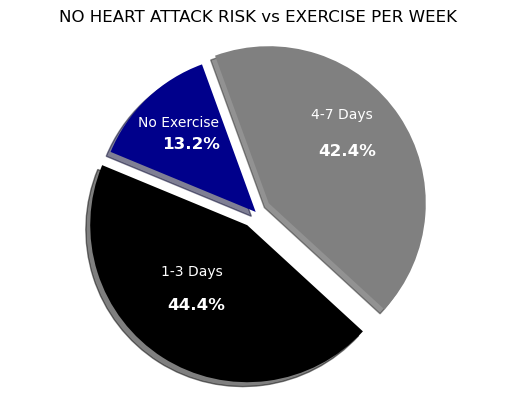

In [302]:
# Generate a pie plot showing the distribution of 
days = ['No Exercise', '1-3 Days', '4-7 Days']
count= [non_har_exercise_cero_count, non_har_exercise_low_count, non_har_exercise_high_count]
plt.pie(count, labels=days, autopct="%1.1f%%", shadow=True, startangle=110, colors=['darkblue','black','grey'], explode = (0, 0.1, 0.1), textprops={'fontsize': 12, 'color':'white', 'fontweight':'bold'})
plt.text(-0.75, 0.55, 'No Exercise', fontsize=10, color='w')
plt.text(-0.6, -0.4, '1-3 Days', fontsize=10, color='w')
plt.text(0.35, 0.6, '4-7 Days', fontsize=10, color='w')
plt.axis("equal")
plt.title('NO HEART ATTACK RISK vs EXERCISE PER WEEK')

# Save the figure
plt.savefig("output_data/Non Heart Attack vs Exercise.png")

# Show the pie chart
plt.show()

**OUTCOME**: 

Among individuals who suffered heart attacks, it is notable that a significant proportion (42.9%) engaged in exercise 1-3 days per week, similarly 42% exercised 4-7 days per week. However, 15% of heart attack cases were among those who did not exercise at all

The data reveals a noteworthy observation: a minimal prevalence of physical activity engagement among patients with no risk of heart attack. However, it's essential to note that these findings may not provide conclusive evidence, as the distribution of physical activity among this group closely resembles that of patients with a high risk of heart attack.


---

### Influence of Alcohol Consumption vs Income per Age


In [303]:
# Filter data for Alcohol consumption in Heart Attack Risk dataset

alcohol_yes_df = heart_attack_df.loc[heart_attack_df['Alcohol Consumption'] == 1, columns]
alcohol_yes_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
1,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
2,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
3,FPS0415,77,Male,228,101/72,68,1,1,1,1,...,10.917524,29886,35.102236,590,7,6,Vietnam,Asia,Northern Hemisphere,1
4,YYU9565,60,Male,259,169/72,85,1,1,1,0,...,8.727417,292173,25.564897,506,1,4,China,Asia,Northern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,NVC8704,82,Male,311,126/108,87,0,1,1,1,...,8.402977,141521,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,1
3135,LZM3606,80,Female,383,153/96,91,1,1,1,0,...,8.234883,101341,20.490450,174,3,4,Argentina,South America,Southern Hemisphere,1
3136,BUE0416,22,Male,347,115/87,108,0,1,1,0,...,6.786750,230235,20.295054,641,2,9,Canada,North America,Northern Hemisphere,1
3137,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1


In [304]:
alcohol_no_df = heart_attack_df.loc[heart_attack_df['Alcohol Consumption'] == 0, columns]
alcohol_no_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
9,ENK3334,27,Male,321,111/91,50,1,0,1,1,...,3.379075,53345,34.196492,558,7,8,Nigeria,Africa,Northern Hemisphere,1
11,FLG2019,52,Female,360,94/60,106,1,0,1,1,...,7.695640,135099,27.095853,743,4,5,New Zealand,Australia,Southern Hemisphere,1
12,TTM1692,47,Male,229,144/108,65,1,0,1,1,...,4.605584,278913,35.251606,595,0,7,India,Asia,Northern Hemisphere,1
15,ENZ9640,33,Male,185,120/63,79,0,1,1,1,...,11.083843,239725,37.209005,675,6,4,Italy,Europe,Southern Hemisphere,1
18,KCY9500,36,Male,203,173/109,101,1,1,1,0,...,10.856995,102220,28.007143,523,2,6,Germany,Europe,Northern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,MQH8244,71,Male,138,129/61,105,0,0,1,0,...,1.941898,176660,28.009631,574,6,4,Japan,Asia,Northern Hemisphere,1
3125,LVM2470,43,Male,370,97/105,45,1,1,1,1,...,8.161941,233974,29.527430,431,7,5,China,Asia,Northern Hemisphere,1
3127,TZL7940,25,Male,382,140/92,76,0,0,1,0,...,4.942414,94686,33.038153,784,4,5,Brazil,South America,Southern Hemisphere,1
3128,TRA1650,74,Female,306,125/101,84,0,0,1,1,...,2.982157,80750,21.279901,418,0,5,South Africa,Africa,Southern Hemisphere,1


In [305]:
# Linear regression for Alcohol Consumption
x_values = alcohol_yes_df['Age']
y_values = alcohol_yes_df['Income']

In [306]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

0       155360.625867
1       154506.136119
2       154648.551077
3       154814.701862
4       155218.210909
            ...      
3134    154696.022730
3135    154743.494383
3136    156120.172309
3137    155526.776651
3138    156048.964830
Name: Age, Length: 1849, dtype: float64


In [307]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -23.74x +156642.36


The r-value is: 3.983447922299425e-05


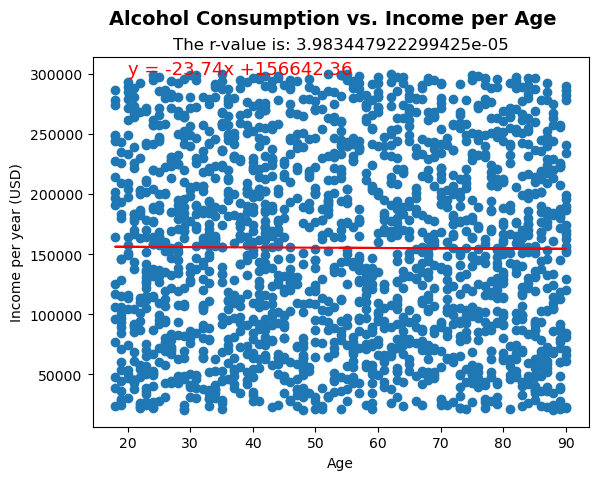

In [308]:
# Build scatter plot for Alcohol Consumption vs. Income per Age

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties

plt.ylabel("Income per year (USD)")
plt.xlabel("Age")
plt.annotate(line_eq,(20,300000),fontsize=13,color="red")
plt.suptitle('Alcohol Consumption vs. Income per Age', fontsize=14, fontweight='bold')
plt.title("The r-value is: 3.983447922299425e-05")

# plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Alcohol vs Income per Age.png")

# Show plot
plt.show()

In [309]:
# Linear regression for Alcohol Consumption
x_values = alcohol_no_df['Age']
y_values = alcohol_no_df['Income']

In [310]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

9       165264.756976
11      164969.835622
12      165028.819893
15      165193.975851
18      165158.585289
            ...      
3119    164745.695392
3125    165076.007309
3127    165288.350684
3128    164710.304830
3131    164851.867080
Name: Age, Length: 1290, dtype: float64


In [311]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -11.8x +165583.27


The r-value is: 9.68096076140149e-06


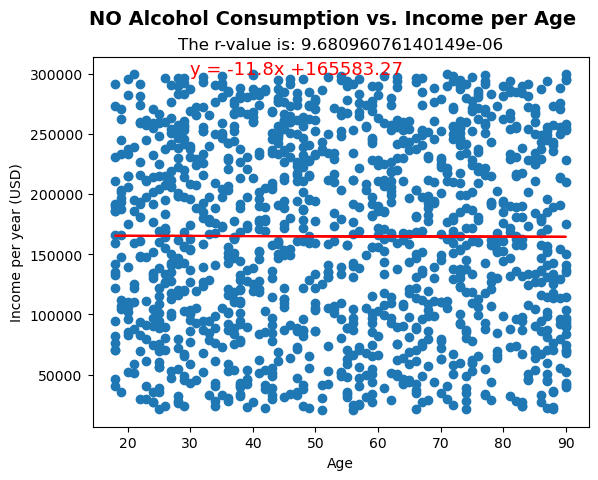

In [312]:
# Build scatter plot for NO Alcohol Consumption vs. Income per Age

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties

plt.ylabel("Income per year (USD)")
plt.xlabel("Age")
plt.annotate(line_eq,(30,300000),fontsize=13,color="red")
plt.suptitle('NO Alcohol Consumption vs. Income per Age', fontsize=14, fontweight='bold')
plt.title("The r-value is: 9.68096076140149e-06")
# plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/NO Alcohol vs Income per Age.png")

# Show plot
plt.show()

**OUTCOME**: 

Among the high-risk heart attack patients, we conducted an analysis to examine the potential association between alcohol consumption and age. Our findings revealed a substantial degree of variability in the results. Specifically, the p-value for patients who consume alcohol was calculated to be 3.08e-05, while for those who abstain from alcohol, it was 9.68e-06. These results unequivocally indicate that there is no discernible correlation between alcohol consumption and age in high-risk heart attack patients


---

### Influence of Age vs Physical Activity

In [313]:
# Linear regression for Age vs Physical Activity (Days Per Week)
x_values = heart_attack_df['Physical Activity Days Per Week']
y_values = heart_attack_df['Age']

In [314]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

0       53.667255
1       53.813316
2       53.521193
3       53.375132
4       54.251500
          ...    
3134    54.251500
3135    53.959377
3136    54.105439
3137    53.813316
3138    53.375132
Name: Physical Activity Days Per Week, Length: 3139, dtype: float64


In [315]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.15x +54.4


The r-value is: 0.0002504543969569016


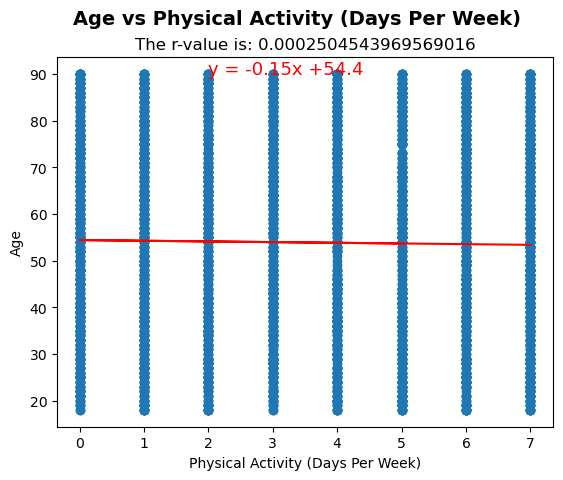

In [316]:
# Build scatter plot for Age vs Physical Activity (Days Per Week)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties

plt.ylabel('Age')
plt.xlabel('Physical Activity (Days Per Week)')
plt.annotate(line_eq,(2,90),fontsize=13,color="red")
plt.suptitle('Age vs Physical Activity (Days Per Week)', fontsize=14, fontweight='bold')
plt.title('The r-value is: 0.0002504543969569016')
# plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Age vs Physical Activity.png")

# Show plot
plt.show()

**OUTCOME**: 

Regarding the connection between the age of high-risk heart attack patients and their level of physical activity, our analysis yielded limited insights. The p-value, standing at 0.00025, suggests an absence of correlation between these variables. The examined population showed no apparent association between age and physical activity, which contrasts with conventional wisdom.


---

### Cholesterol Level vs Physical Activity


In [317]:
# Linear regression for Cholesterol vs Physical Activity (Days Per Week)
x_values = heart_attack_df['Physical Activity Days Per Week']
y_values = heart_attack_df['Cholesterol']

In [318]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

0       261.529585
1       261.818504
2       261.240665
3       260.951746
4       262.685261
           ...    
3134    262.685261
3135    262.107423
3136    262.396342
3137    261.818504
3138    260.951746
Name: Physical Activity Days Per Week, Length: 3139, dtype: float64


In [319]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.29x +262.97


The r-value is: 6.840943742500091e-05


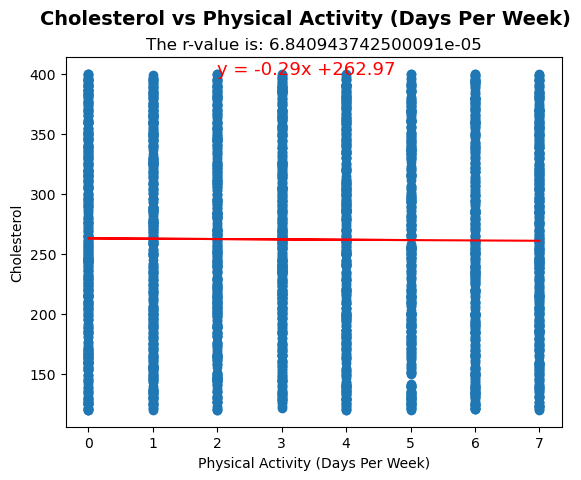

In [320]:
# Build scatter plot for Cholesterol vs Physical Activity (Days Per Week)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Incorporate the other graph properties

plt.ylabel('Cholesterol')
plt.xlabel('Physical Activity (Days Per Week)')
plt.annotate(line_eq,(2,400),fontsize=13,color="red")
plt.suptitle('Cholesterol vs Physical Activity (Days Per Week)', fontsize=14, fontweight='bold')
plt.title("The r-value is: 6.840943742500091e-05")
# plt.grid(True)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Cholesterol vs Physical Activity.png")

# Show plot
plt.show()

**OUTCOME**:

As with previous multifactorial analyses, our correlation study fails to identify any significant relationship between cholesterol levels and physical activity

---

### Income Distribution of the complete dataset

In [321]:
# Emiliano's Code

#Reading csvfile for Heart Attack Risk dataset
data = pd.read_csv('./heart_attack_prediction_dataset.csv')

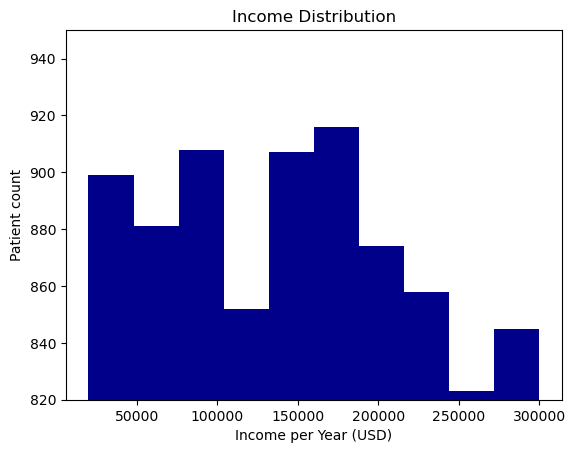

In [322]:
# Income distribution from the heart_attack_prediction_datase

plt.hist(data['Income'],color = 'darkblue')
plt.ylim(820,950)
plt.title('Income Distribution')
plt.xlabel('Income per Year (USD)')
plt.ylabel('Patient count')

plt.savefig("output_data/Income Distribution.png")
plt.show()

### No Risk of Heart Attack Analysis

In [323]:
#dividign the data set heart attack risk
columnas = list(data.columns)
df_nonheartAttack = data.loc[data['Heart Attack Risk'] == 0,columnas]
df_nonheartAttack

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere,0
8757,YDX2478,59,Female,378,93/78,99,0,1,1,1,...,7.495231,70415,39.976061,158,1,9,China,Asia,Northern Hemisphere,0
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0


In [324]:
#By AGE
NoRisk_age_series = df_nonheartAttack['Age']
NoRisk_age_series.describe().to_frame()

,Age
count,5624.000000
mean,53.606330
std,21.192815
min,18.000000
25%,35.000000
50%,54.000000
75%,72.000000
max,90.000000


#### Smoking Analysis

In [325]:
#How much people smoke who has a hearth attack
df_pie1 = df_nonheartAttack.groupby('Smoking')['Smoking'].count().to_frame()
df_pie1

,Smoking
Smoking,
0,575
1,5049


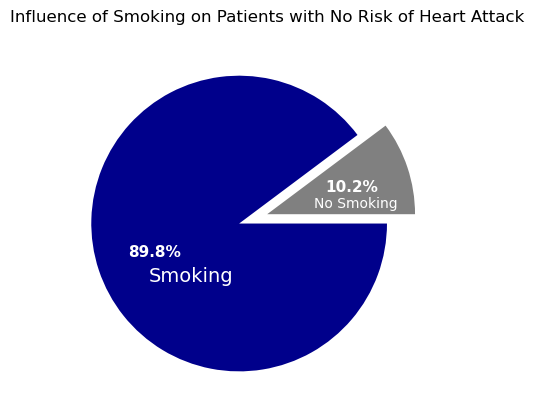

In [326]:
#Plotting
labels = ['No Smoking','Smoking']
plt.pie(df_pie1['Smoking'],labels = labels,autopct='%1.1f%%',explode = [0,0.2], startangle=0, colors = ['grey','darkblue'], textprops={'fontsize': 11, 'color':'white', 'fontweight':'bold'})
plt.title('Influence of Smoking on Patients with No Risk of Heart Attack')
plt.text(0.32, 0.05, 'No Smoking', fontsize=10, color='w')
plt.text(-0.8, -0.45, 'Smoking', fontsize=14, color='w')

plt.savefig("output_data/Influence of Smoking on Patients with No Risk of Heart Attack.png")
plt.show()

#### Sleeping Hours Analysis

In [327]:
#SLEEPING HOURS
pie_sleephours1 = df_nonheartAttack.groupby('Sleep Hours Per Day')['Sleep Hours Per Day'].count().to_frame()
pie_sleephours1 = pie_sleephours1.rename(columns={'Sleep Hours Per Day':'People Count'})
pie_sleephours1 = pie_sleephours1.reset_index()
pie_sleephours1

,Sleep Hours Per Day,People Count
0,4,752
1,5,801
2,6,807
3,7,816
4,8,807
5,9,778
6,10,863


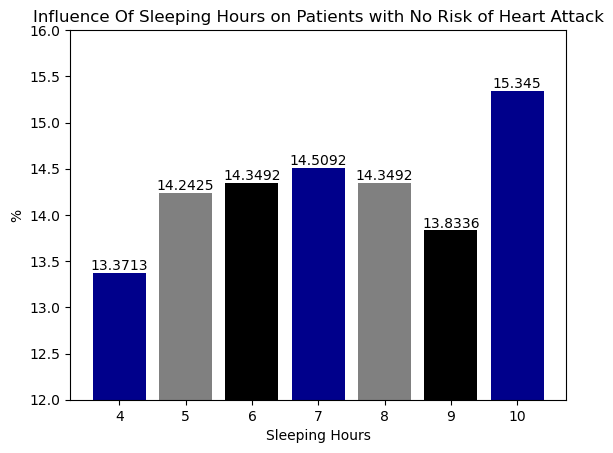

In [328]:
#Plotting
axis = np.array(pie_sleephours1['People Count'])
axis = (axis/sum(axis))*100
labels = list(pie_sleephours1['Sleep Hours Per Day'])
axis = list(axis)
test = plt.bar(labels,axis,color = ['darkblue','grey','black'])
plt.ylim(12,16)
plt.ylabel('%')
plt.xlabel('Sleeping Hours')
plt.title('Influence Of Sleeping Hours on Patients with No Risk of Heart Attack')
plt.bar_label(test)

plt.savefig("output_data/Influence Of Sleeping Hours on Patients with No Risk of Heart Attack.png")
plt.show()

### Risk of Heart Attack Analysis

In [329]:
#Heart attack dataframe
df_heartAttack = data.loc[data['Heart Attack Risk'] == 1,columnas]
df_heartAttack

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
12,FPS0415,77,Male,228,101/72,68,1,1,1,1,...,10.917524,29886,35.102236,590,7,6,Vietnam,Asia,Northern Hemisphere,1
13,YYU9565,60,Male,259,169/72,85,1,1,1,0,...,8.727417,292173,25.564897,506,1,4,China,Asia,Northern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,NVC8704,82,Male,311,126/108,87,0,1,1,1,...,8.402977,141521,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,1
8754,LZM3606,80,Female,383,153/96,91,1,1,1,0,...,8.234883,101341,20.490450,174,3,4,Argentina,South America,Southern Hemisphere,1
8756,BUE0416,22,Male,347,115/87,108,0,1,1,0,...,6.786750,230235,20.295054,641,2,9,Canada,North America,Northern Hemisphere,1
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1


In [330]:
risk_age_Series = df_heartAttack['Age']
risk_age_Series.describe().to_frame()

,Age
count,3139.000000
mean,53.890092
std,21.352881
min,18.000000
25%,35.000000
50%,54.000000
75%,73.000000
max,90.000000


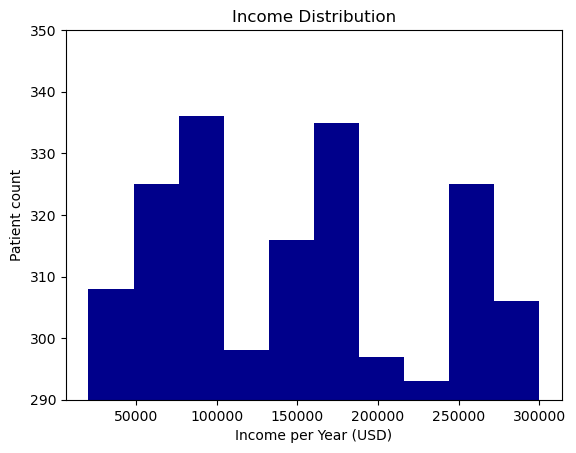

In [331]:
#Income of people with risk
plt.hist(df_heartAttack['Income'],color = 'darkblue')
plt.ylim(290,350)
plt.title('Income Distribution')
plt.xlabel('Income per Year (USD)')
plt.ylabel('Patient count')

plt.savefig("output_data/Income Distribution.png")
plt.show()

#### Smoking Analysis

In [332]:
pie2 = df_heartAttack.groupby('Smoking')['Smoking'].count().to_frame()
pie2


,Smoking
Smoking,
0,329
1,2810


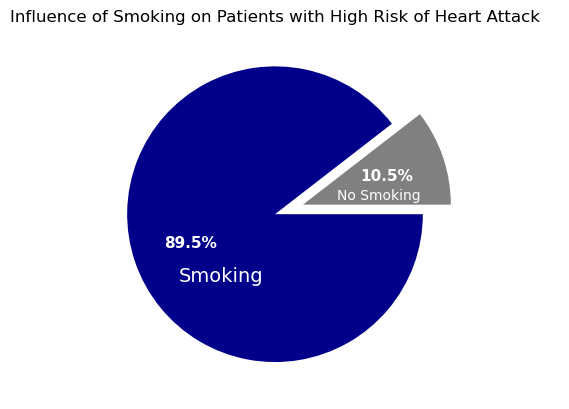

In [333]:
plt.pie(pie2['Smoking'],labels = ['No Smoking','Smoking'],autopct='%1.1f%%',explode=[0.2,0],colors = ['grey','darkblue'], textprops={'fontsize': 11, 'color':'white', 'fontweight':'bold'})
plt.title('Influence of Smoking on Patients with High Risk of Heart Attack')
plt.text(0.42, 0.1, 'No Smoking', fontsize=10, color='w')
plt.text(-0.65, -0.45, 'Smoking', fontsize=14, color='w')

plt.savefig("output_data/Influence of Smoking on Patients with High Risk of Heart Attack.png")
plt.show()

#### Sleeping Hours Analysis

In [334]:
#Sleeping hours Analysis
pie_sleephours2 = df_heartAttack.groupby('Sleep Hours Per Day')['Sleep Hours Per Day'].count().to_frame()
pie_sleephours2 = pie_sleephours2.rename(columns={'Sleep Hours Per Day':'People Count'})
pie_sleephours2 = pie_sleephours2.reset_index()
pie_sleephours2

,Sleep Hours Per Day,People Count
0,4,429
1,5,462
2,6,469
3,7,454
4,8,481
5,9,414
6,10,430


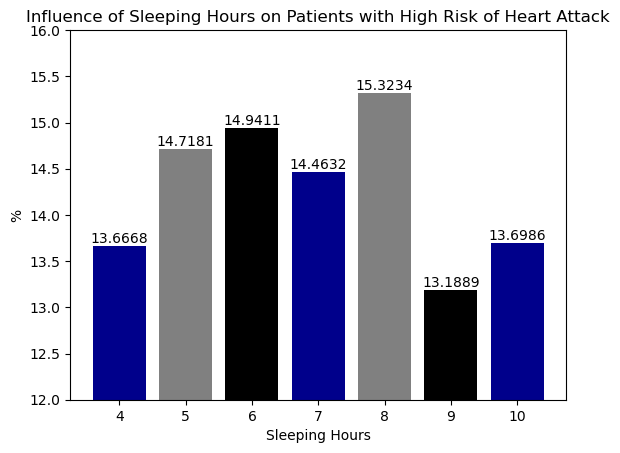

In [335]:
#Sleeping Hours plotting
axis2 = np.array(pie_sleephours2['People Count'])
axis2 = (axis2/sum(axis2))*100
labels2 = list(pie_sleephours2['Sleep Hours Per Day'])
axis2 = list(axis2)
test2 = plt.bar(labels2,axis2,color = ['darkblue','grey','black'])
plt.ylim(12,16)
plt.ylabel('%')
plt.xlabel('Sleeping Hours')
plt.title('Influence of Sleeping Hours on Patients with High Risk of Heart Attack')
plt.bar_label(test2)

plt.savefig("output_data/Influence of Sleeping Hours on Patients with High Risk of Heart Attack.png")
plt.show()

**INCOME ANALYSIS OUTCOME**

The income distribution in the sample appears to lack a distinct pattern. The data only indicates a lower prevalence of patients falling within the income ranges of 100,000 to 150,000 and 180,000 to 250,000.

**SMOKING ANALYSIS OUTCOME**

Analysis of the smoking habits of patients with high and low risks of heart attacks did not reveal significant differences. However, an interesting finding from the data is that patients who smoke tend to exhibit higher levels of triglycerides. As a result, based on the data we've examined, it suggests that this type of blood fat might serve as a more reliable indicator for predicting the risk of heart attack.


**SLEEPING HOURS ANALYSIS OUTCOME**

We observed that, in terms of the number of sleeping hours, both distributions are characterized by moderate peaks. More patients with a high risk of heart attacks have 8 hours of sleep, while more of those with no risk of heart attack sleep 10 hours. In both cases, the least common results in the studied sample were associated with either 4 hours or 9 hours of sleep.


-----

### Influence of Location on Heart Attacks

In [336]:
#By countries and continent 
countries_risk_figure = df_heartAttack.groupby('Country')['Country'].count().to_frame()
countries_risk_figure = countries_risk_figure.rename(columns = {'Country':'Country count'})
countries_risk_figure = countries_risk_figure.reset_index()
countries_risk_figure = countries_risk_figure.sort_values('Country count',ascending = True)
countries_risk_figure

,Country,Country count
8,India,129
9,Italy,136
13,South Africa,144
10,Japan,144
19,Vietnam,148
15,Spain,150
11,New Zealand,151
4,China,155
6,France,157
3,Canada,158


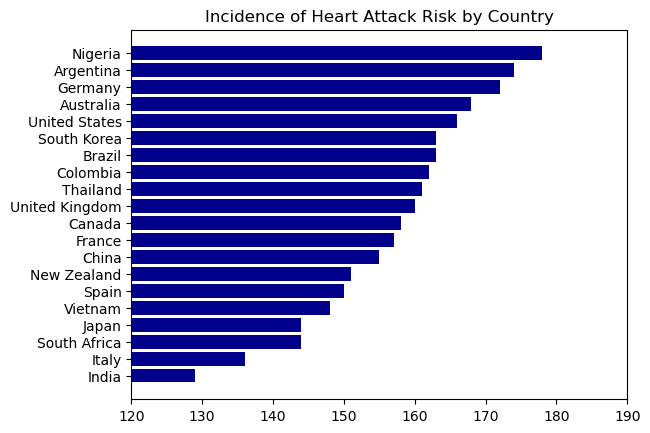

In [337]:
#Plotting
xaxis = list(countries_risk_figure['Country'])
yaxis = list(countries_risk_figure['Country count'])
plt.barh(xaxis,yaxis, color = 'darkblue')
plt.xlim(120,190)
plt.title('Incidence of Heart Attack Risk by Country')

plt.savefig("output_data/Incidence of Heart Attack Risk by Country.png")
plt.show()

In [338]:
#By countries and continent 
continent_risk_figure = df_heartAttack.groupby('Continent')['Continent'].count().to_frame()
continent_risk_figure = continent_risk_figure.rename(columns = {'Continent':'Continent count'})
continent_risk_figure = continent_risk_figure.reset_index()
continent_risk_figure = continent_risk_figure.sort_values('Continent count',ascending = True)
continent_risk_figure

,Continent,Continent count
2,Australia,319
0,Africa,322
4,North America,324
5,South America,499
3,Europe,775
1,Asia,900


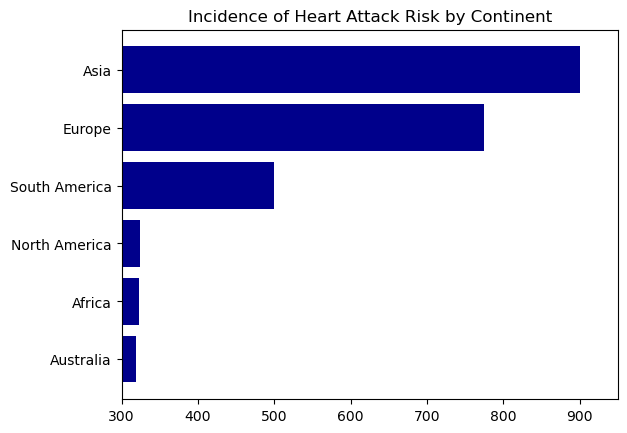

In [339]:
#Plotting
xaxis_continent = list(continent_risk_figure['Continent'])
yaxis_continent = list(continent_risk_figure['Continent count'])
plt.barh(xaxis_continent,yaxis_continent, color = 'darkblue')
plt.xlim(300,950)
plt.title('Incidence of Heart Attack Risk by Continent')

plt.savefig("output_data/Incidence of Heart Attack Risk by Continent.png")
plt.show()

**OUTCOME**

Out of the total number of patients in the sample with a high risk of heart attack, 900 patients originally hailed from Asia, and 775 were of European origin. It appears that both Asia and Europe have a higher incidence of heart attack risk. However, when we delve deeper into the breakdown by country, it's noteworthy that the top two countries with the highest quantity of patients at high risk of heart attack are not part of these continents. Nigeria and Argentina, surprisingly, top the list with the highest number of such patients. In the third position, German nationals also exhibit a significant risk of heart attack, with 172 patients in this category

---

#### Influence of Triglycerides on Heart Attacks

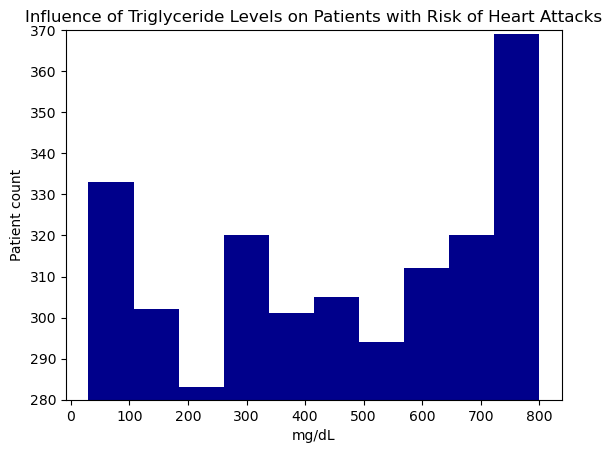

In [340]:
plt.hist(df_heartAttack['Triglycerides'],color = 'darkblue')
plt.ylim(280,370)
plt.title('Influence of Triglyceride Levels on Patients with Risk of Heart Attacks')
plt.xlabel('mg/dL')
plt.ylabel('Patient count')

plt.savefig("output_data/Influence of Triglyceride Levels on Patients with Risk of Heart Attacks.png")
plt.show()

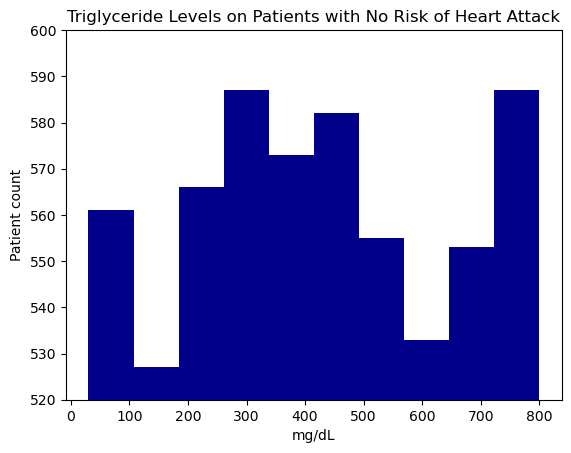

In [341]:
plt.hist(df_nonheartAttack['Triglycerides'],color = 'darkblue')
plt.ylim(520,600)
plt.title('Triglyceride Levels on Patients with No Risk of Heart Attack')
plt.xlabel('mg/dL')
plt.ylabel('Patient count')

plt.savefig("output_data/Triglyceride Levels on Patients with No Risk of Heart Attack.png")
plt.show()

In [342]:
hightryglicerid = data.loc[data['Triglycerides']>600]
hightryglicerid

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
14,VTW9069,88,Male,297,112/81,102,1,1,1,0,...,10.425490,165300,25.491741,635,3,6,China,Asia,Northern Hemisphere,0
15,DCY3282,73,Male,122,114/88,97,1,1,1,0,...,10.086479,265839,36.524395,773,5,8,Italy,Europe,Southern Hemisphere,1
20,MBI0008,66,Male,340,180/101,69,1,0,1,1,...,6.218069,156946,38.088671,747,1,10,Canada,North America,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,AEX7905,35,Male,323,164/74,84,1,0,1,0,...,11.389512,174193,34.378134,761,5,5,Australia,Australia,Southern Hemisphere,0
8750,FDK8693,34,Female,304,102/92,93,0,1,0,1,...,6.900037,223874,22.418494,791,4,5,China,Asia,Northern Hemisphere,0
8751,SVO4635,75,Male,176,102/89,78,0,0,1,1,...,6.634988,228009,23.793280,748,5,8,Spain,Europe,Southern Hemisphere,1
8756,BUE0416,22,Male,347,115/87,108,0,1,1,0,...,6.786750,230235,20.295054,641,2,9,Canada,North America,Northern Hemisphere,1


In [343]:
smokingT = hightryglicerid.groupby('Smoking')['Smoking'].count().to_frame()
smokingT = smokingT.rename(columns = {'Smoking':'Count'})
smokingT = smokingT.reset_index()
smokingT

,Smoking,Count
0,0,245
1,1,2076


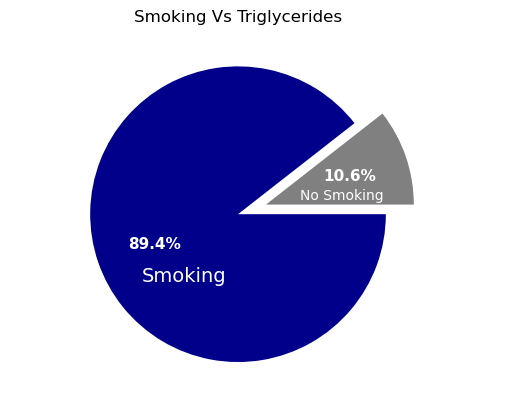

In [344]:
plt.pie(smokingT['Count'],labels = ['No Smoking','Smoking'],autopct='%1.1f%%',explode=[0.2,0],colors = ['grey','darkblue'], textprops={'fontsize': 11, 'color':'white', 'fontweight':'bold'})
plt.title('Smoking Vs Triglycerides')
plt.text(0.42, 0.1, 'No Smoking', fontsize=10, color='w')
plt.text(-0.65, -0.45, 'Smoking', fontsize=14, color='w')

plt.savefig("output_data/Smoking Vs Triglycerides.png")
plt.show()

**TRIGLYCERIDE ANALYSIS OUTCOME**

The distribution of triglyceride levels among patients with a high risk of heart attack exhibited a slight negative bias, suggesting that higher triglyceride levels are associated with a greater number of patients at high risk of heart attacks. Conversely, when examining the distribution of patients with no risk of heart attack, it becomes evident that the distribution is highly asymmetric.

---

### Additional Biometric Analysis (not considered on Conclusions)

In [345]:
Multiple_badhabits = data.loc[
    (data['Sleep Hours Per Day'] < 5)
    &
    (data['Smoking'])
    &
    (data['Obesity'])
    &
    (data['Sedentary Hours Per Day']>6),columnas]
Multiple_badhabits

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
34,DDG3686,42,Male,360,103/107,44,1,0,1,1,...,9.580940,94144,29.701877,586,1,4,India,Asia,Northern Hemisphere,1
45,ENZ9640,33,Male,185,120/63,79,0,1,1,1,...,11.083843,239725,37.209005,675,6,4,Italy,Europe,Southern Hemisphere,1
65,KTR4778,63,Male,153,131/76,86,1,1,1,1,...,11.659806,262933,19.675829,82,0,4,Brazil,South America,Southern Hemisphere,1
79,QJA1796,35,Male,200,122/77,110,1,0,1,1,...,7.157244,214110,30.759235,543,7,4,France,Europe,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,RLK4176,57,Male,360,94/73,45,1,1,1,1,...,6.256110,110625,20.166520,285,5,4,United Kingdom,Europe,Northern Hemisphere,1
8671,NEO8325,54,Male,360,112/73,87,1,0,1,1,...,11.627343,248240,33.243406,788,6,4,Italy,Europe,Southern Hemisphere,0
8679,TEE1631,36,Male,307,118/93,63,1,1,1,1,...,6.372519,101594,28.752497,456,6,4,Canada,North America,Northern Hemisphere,1
8686,IKH1668,58,Female,244,90/75,70,1,0,1,1,...,9.633358,255905,21.317236,390,2,4,Nigeria,Africa,Northern Hemisphere,1


In [346]:
Multiple_badhabits.groupby('Sex')['Sex'].count().to_frame()

,Sex
Sex,
Female,67
Male,205


#### Influence of Age on Heart Attacks

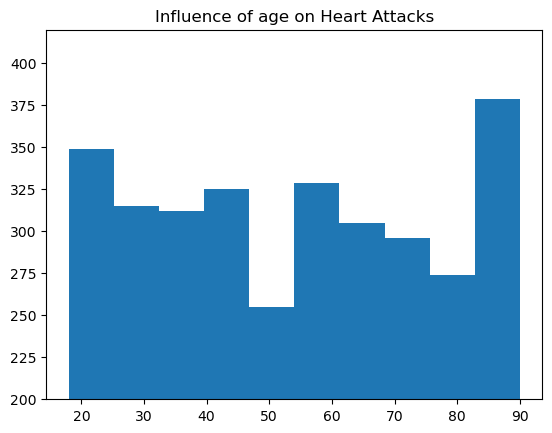

In [347]:
plt.hist(df_heartAttack['Age'])
plt.ylim(200,420)
plt.title('Influence of age on Heart Attacks')


plt.show()

#### Influence of Cholesterol on Heart Attacks

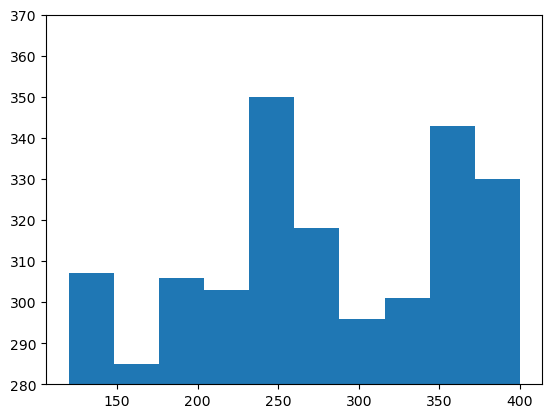

In [348]:
plt.hist(df_heartAttack['Cholesterol'])
plt.ylim(280,370)
plt.show()

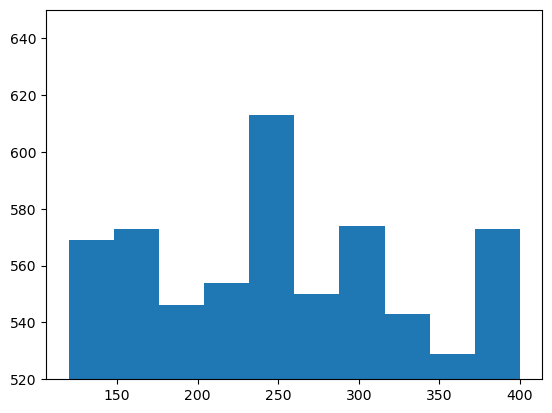

In [349]:
plt.hist(df_nonheartAttack['Cholesterol'])
plt.ylim(520,650)
plt.show()

#### Influence of Heart Rate on Heart Attacks

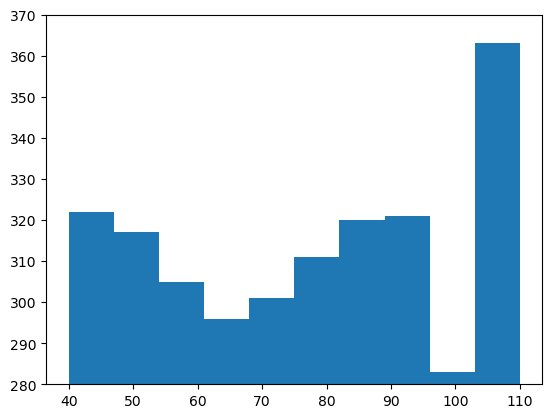

In [350]:
plt.hist(df_heartAttack['Heart Rate'])
plt.ylim(280,370)
plt.show()

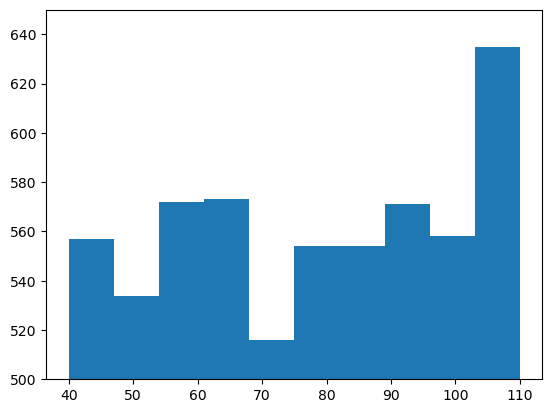

In [351]:
plt.hist(df_nonheartAttack['Heart Rate'])
plt.ylim(500,650)
plt.show()

---

# Conclusions

- The results obtained from the analysis of this dataset are highly inconclusive. There is a striking level of symmetry observed when comparing the influence of different variables on high or low risk of experiencing a heart attack.

- Based on the results obtained, there is limited evidence to suggest that the type of diet, alcohol consumption,  exercise or number of sleeping hours have a significant influence on the likelihood of experiencing a heart attack.

- The findings indicate that triglyceride levels may exert an influence on patients with a higher risk of heart attack.

- The data concerning smoking habits did not yield conclusive results regarding the direct impact of this habit on the risk of having a heart attack. However, when exploring the interaction between smoking and triglyceride levels, we did observe a notable tendency for patients with a high risk of heart attack to exhibit elevated triglyceride levels. These findings suggest that smoking may be indirectly related to heart attacks through its influence on triglyceride levels.

- Upon conducting the multifactorial analysis, the results have raised doubts about the methodology employed in sample selection. The data reveals counterintuitive findings that contradict commonly accepted knowledge.


---

**Limitations in the Analysis:**


One of the limitations we've identified in this analysis is the absence of information regarding the methodology used for sample selection, making it challenging to ascertain whether the sample was chosen randomly. Additionally, the definition of "risk of heart attack" is represented by binary values, which lack the necessary details to shed light on the nature of this parameter. Acquiring more comprehensive information about how this value is determined could potentially offer valuable insights into some of the obtained results.